In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
%matplotlib inline

In [5]:
df = pd.read_csv('Dow Jones Iron & Steel Historical Data.csv')
df = df[['Date', 'Price']].dropna()

df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

daily_df = df.resample('D').mean()
d_df = daily_df.reset_index().dropna()

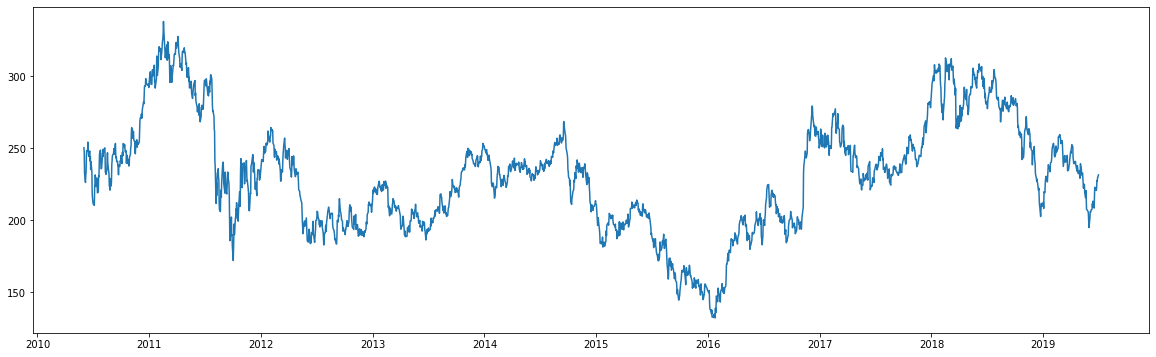

In [6]:
d_df.columns = ['ds', 'y']

fig = plt.figure(facecolor='w', figsize=(20, 6))
plt.plot(d_df.ds, d_df.y)

In [7]:
m = Prophet()
m.fit(d_df)

future = m.make_future_dataframe(periods=90)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
2372,2019-09-25,231.330410,207.148230,255.839872
2373,2019-09-26,230.970260,206.048428,256.315168
2374,2019-09-27,230.297579,204.395391,252.714691
2375,2019-09-28,239.580689,213.459368,264.144040
2376,2019-09-29,239.123545,214.546536,263.069179


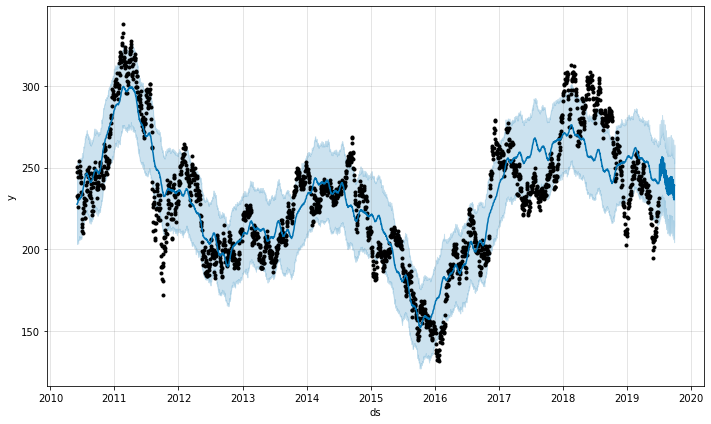

In [8]:
fig1 = m.plot(forecast)

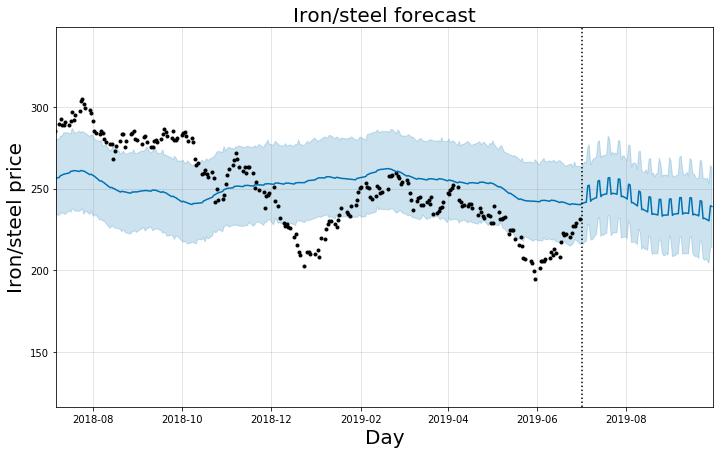

In [10]:
from datetime import datetime, timedelta

fig1 = m.plot(forecast)

#datenow = datetime.now()
datenow = datetime(2019, 7, 2)
dateend = datenow + timedelta(days=90)
datestart = dateend - timedelta(days=450)

plt.xlim([datestart, dateend])
plt.title("Iron/steel forecast", fontsize=20)
plt.xlabel("Day", fontsize=20)
plt.ylabel("Iron/steel price", fontsize=20)
plt.axvline(datenow, color="k", linestyle=":")
plt.show()

In [11]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-90:]

,ds,yhat,yhat_lower,yhat_upper
2287,2019-07-02,241.103841,216.622645,263.538756
2288,2019-07-03,241.190193,215.881305,265.060977
2289,2019-07-04,241.564721,217.950426,266.294606
2290,2019-07-05,241.669212,217.565945,265.582761
2291,2019-07-06,251.761146,228.100265,274.938743
2292,2019-07-07,252.132641,227.660460,276.812091
2293,2019-07-08,242.298175,219.077514,264.403473
2294,2019-07-09,243.424312,218.560685,266.694452
2295,2019-07-10,243.710286,219.618192,268.342016
2296,2019-07-11,244.245458,221.167908,268.314072


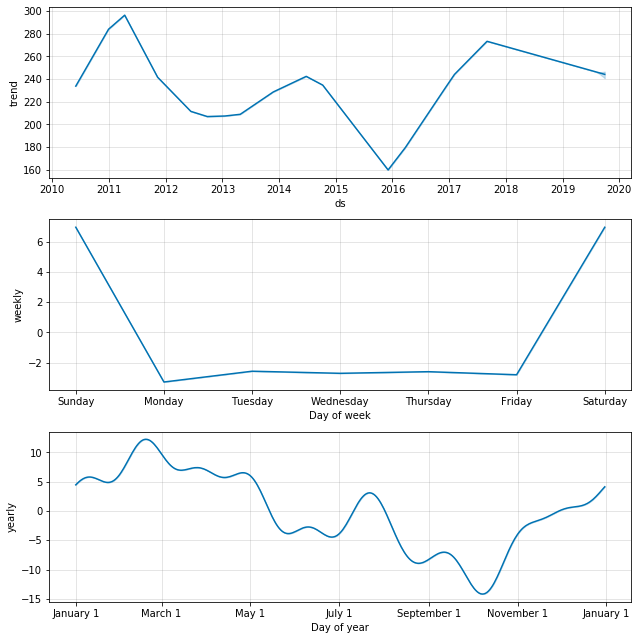

In [12]:
fig2 = m.plot_components(forecast)

In [13]:
from fbprophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(m, horizon='90 days')
df_p = performance_metrics(df_cv)
df_p.head(5)

INFO:fbprophet:Making 64 forecasts with cutoffs between 2011-06-28 00:00:00 and 2019-04-02 00:00:00


,horizon,mse,rmse,mae,mape,coverage
0,9 days,698.506352,26.429271,20.949499,0.094627,0.473401
1,10 days,730.561684,27.028905,21.421560,0.096729,0.462121
2,11 days,740.924785,27.219934,21.602769,0.097763,0.461902
3,12 days,757.822707,27.528580,21.911317,0.099128,0.449554
4,13 days,785.501791,28.026805,22.330751,0.100721,0.441246


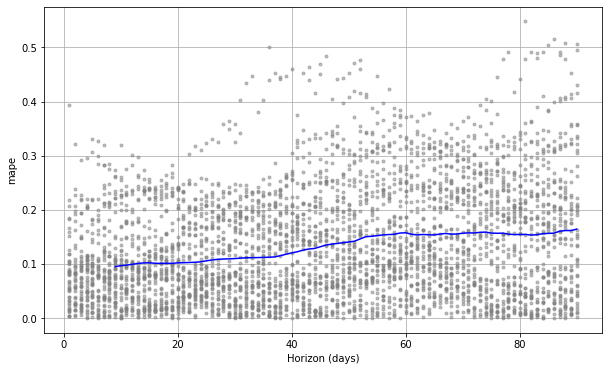

In [14]:
from fbprophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(df_cv, metric='mape')

In [15]:
import pickle
with open('forecast_model.pckl', 'wb') as fout:
    pickle.dump(m, fout)

with open('forecast_model.pckl', 'rb') as fin:
    m2 = pickle.load(fin)

In [16]:
future2 = m2.make_future_dataframe(periods=90)
forecast2 = m2.predict(future2)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2372,2019-09-25,231.330410,206.449901,256.166110
2373,2019-09-26,230.970260,206.007123,254.421104
2374,2019-09-27,230.297579,207.024861,254.416094
2375,2019-09-28,239.580689,216.250076,262.946626
2376,2019-09-29,239.123545,214.478721,261.416495


In [17]:
from flask import Flask, jsonify, request
from flask_cors import CORS, cross_origin

In [ ]:
app = Flask(__name__)
CORS(app)

@app.route("/katana-ml/api/v1.0/forecast/ironsteel", methods=['POST'])
def predict():
    horizon = int(request.json['horizon'])
    
    future2 = m2.make_future_dataframe(periods=horizon)
    forecast2 = m2.predict(future2)
    
    data = forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][-horizon:]
    
    ret = data.to_json(orient='records', date_format='iso')
    
    return ret

# running REST interface, port=3000 for direct test
if __name__ == "__main__":
    app.run(debug=False, host='0.0.0.0', port=3000)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://0.0.0.0:3000/ (Press CTRL+C to quit)
INFO:werkzeug:172.17.0.1 - - [02/Jul/2019 09:01:20] "POST /katana-ml/api/v1.0/forecast/ironsteel HTTP/1.1" 200 -
INFO:werkzeug:172.17.0.1 - - [02/Jul/2019 09:01:45] "POST /katana-ml/api/v1.0/forecast/ironsteel HTTP/1.1" 200 -
